# Linear Regression (AI for Engineer 2/2020)

# House Price Prediction (MEDV)


![](https://lc.zoocdn.com/9f2d741927ffa878efa9a4ffa181dfcb119f7fc3.jpg)

# Load data

In [ ]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#define figure size

plt.rcParams['figure.figsize'] = [13, 10]

In [ ]:
#read data

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos1 = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/AI_For_Engineering_2020/housing.csv', header=None, delimiter=r"\s+", names=column_names)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

# analyze data

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per dollar 10,000.

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's


In [ ]:
# data frame with first 5 rows (by default)

bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# dimension

bos1.shape

(506, 14)

In [ ]:
#define x and y (input and output)

# get data by column index 0-13

x = bos1.iloc[:,0:13]
#or x = bos1.drop(['MEDV'], axis =1)
#or x = bos1.drop(['MEDV'], axis ='columns')
y = bos1["MEDV"]

In [ ]:
#show data summary

set_option('precision', 1)
bos1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [ ]:
#data information
bos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#no missing values from all columns

In [ ]:
# correlation

set_option('precision', 2)
bos1.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


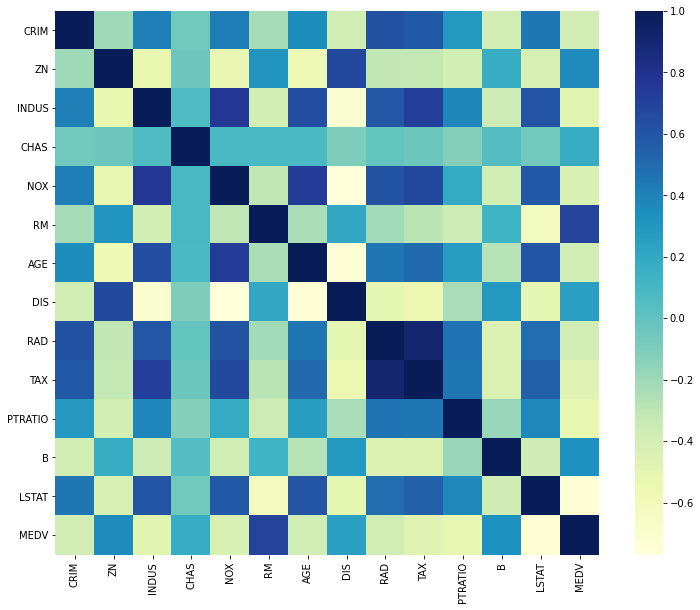

In [ ]:
#code for correlation plot

#library to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations = bos1.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# see how strong each variable relates to MEDV
bos1.corr()['MEDV']

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [ ]:
#corr sorting
bos1.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
AGE       -0.38
RAD       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

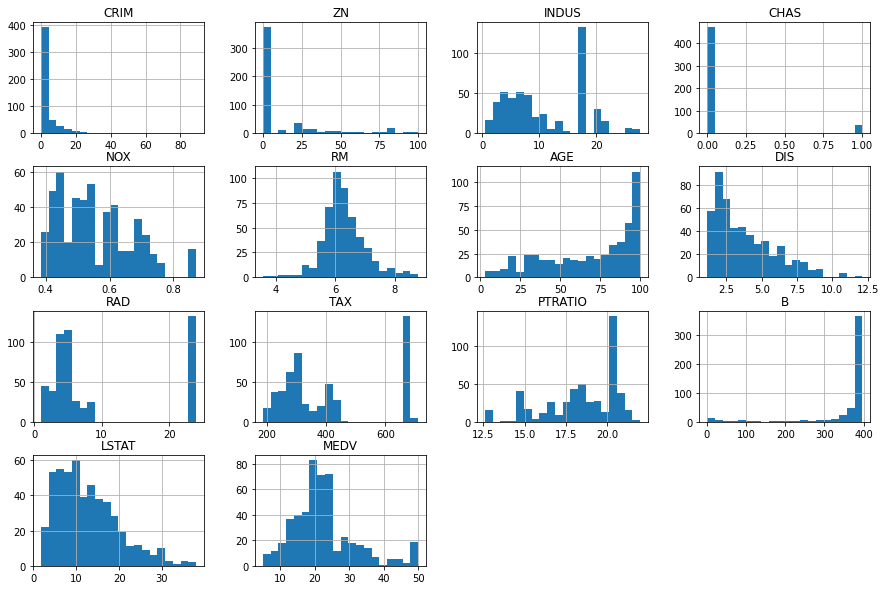

In [ ]:
# Data visualizations

# histograms
bos1.hist(bins=20,figsize=(15,10),grid=True);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


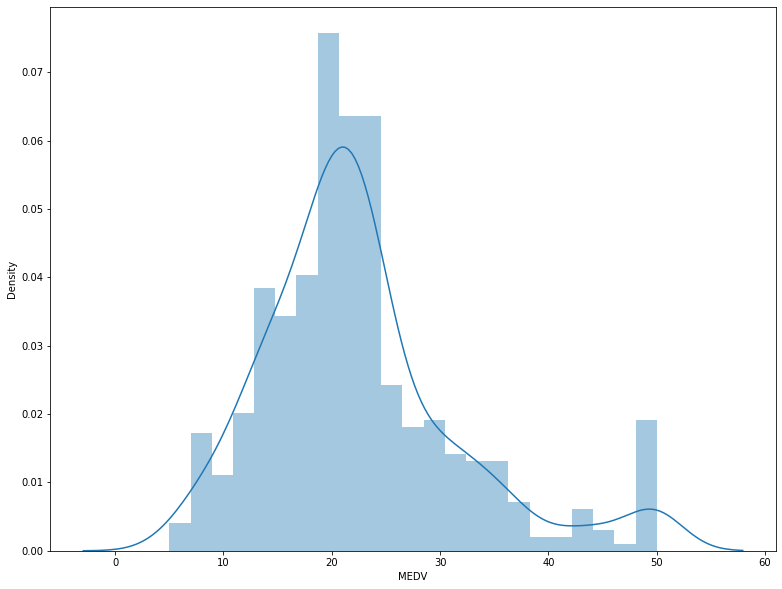

In [ ]:
#distribution plot of the output

sns.distplot(bos1['MEDV']);

# train a model

In [ ]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.33, random_state =5)


In [ ]:
#train model

from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)



In [ ]:
#predict

pred_y = lm.predict(x_test)
pred_y

array([37.46723562, 31.39154701, 27.1201962 ,  6.46843347, 33.62966737,
        5.67067989, 27.03946671, 29.92704748, 26.35661334, 22.45246021,
       32.20504441, 21.78641653, 23.41138441, 33.60894362, 28.28619511,
       15.13859055,  0.30087325, 18.71850376, 14.4706712 , 11.10823598,
        2.69494197, 19.21693734, 38.41159345, 24.36936442, 31.61493439,
       11.42210397, 24.92862188, 23.31178043, 22.7764079 , 20.65081211,
       16.035198  ,  7.07978633, 17.65509209, 22.81470561, 29.21943405,
       18.61354566, 28.37701843,  8.80516873, 41.65140459, 34.02910176,
       20.1868926 ,  3.95600857, 29.69124564, 12.18081256, 27.19403498,
       30.63699231, -6.24952457, 19.9462404 , 21.55123979, 13.36478173,
       20.39068171, 19.87353324, 23.57656877, 13.40141285, 17.66457201,
       24.77424747, 35.31476509, 15.48318159, 28.50764575, 21.72575404,
       20.58142839, 26.08460856, 14.51816968, 32.37494056, 20.80917392,
       12.18932524, 19.45551285, 25.23390429, 21.77302317, 21.30

In [ ]:
#compare actual vs predict

pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
226,37.6,37.47
292,27.9,31.39
90,22.6,27.12
373,13.8,6.47
273,35.2,33.63


Text(0, 0.5, 'Predicted Y')

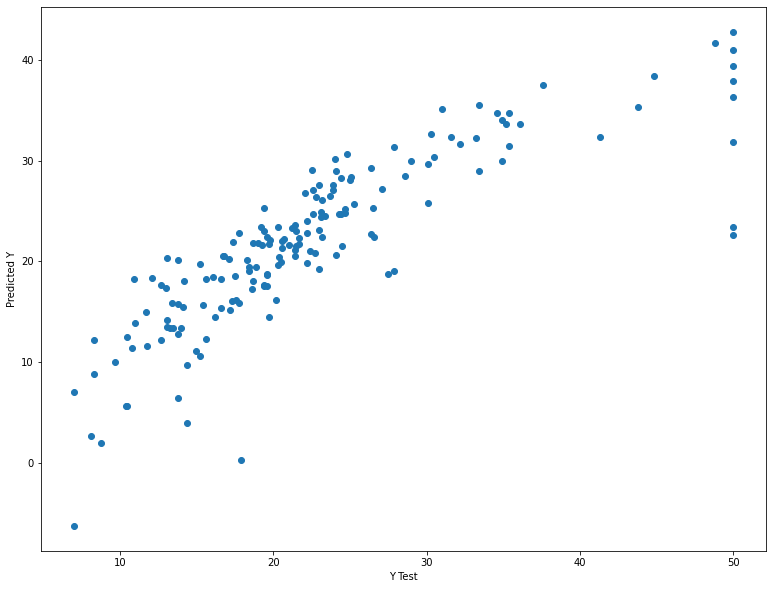

In [ ]:
#plot actual vs predict

plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE (mean of ^2 error)

import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

28.530458765974576


In [ ]:
#rms
from math import sqrt
print(sqrt(mse))

5.341391089030513


In [ ]:
#linear score (train data set)

#0-1 , 1 = best linear line
lm.score(x_train,y_train)

0.7551332741779998

In [ ]:
#mean, min, max of y_test 
print('mean y_test:',np.mean(y_test))
print('min y_test:',np.min(y_test))
print('max y_test:',np.max(y_test))
print('range y_test:',np.max(y_test)-np.min(y_test) )

mean y_test: 22.52395209580839
min y_test: 7.0
max y_test: 50.0
range y_test: 43.0


In [ ]:
#Co-efficients of Linear Regression

lm.coef_


array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [ ]:
# Interception of Linear Regression

lm.intercept_

32.8589326340859

In [ ]:
#linear score (test data set)

lm.score(x_test,y_test)

0.6956551656111607

In [ ]:
#Optional: Adjusted R-Squre

i=1
n=len(x_train)
p=len(lm.coef_)
R=lm.score(x_test,y_test)


Rad=1-(n-i)*(1-R)/(n-p)
Rad



0.6844522882716941

# Result

In [ ]:
#rms of this model:5.341391089030513
#compare to range of y_test:43.0
# %difference
print('% dirrerence of rms vs y range:', (5.341391089030513/43)*100)

% dirrerence of rms vs y range: 12.421839741931427


In [ ]:
#% dirrerence of rms vs y range is 12.422% (I think it is acceptable ! not a big error)